# Analysis of Inventory Listings and Sale Prices in the US

This analysis examines trends in **sale prices** and **inventory listings** across the United States to determine whether they are increasing or decreasing over time.



# Data Preparation

In [1767]:
import os
import glob

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.dates as mdates
%matplotlib inline
sns.set(color_codes=True)

In [1768]:
# Define file paths
data_dir = 'data/'
file_paths = {
    "inventory": os.path.join(data_dir, "Metro_invt_fs_uc_sfrcondo_sm_week.csv"),
    "sales": os.path.join(data_dir, "Metro_median_sale_price_uc_sfrcondo_sm_sa_week.csv"), #Median Sale Price
}

In [1769]:
# Load the files into a dictionary with custom keys
df = {key: pd.read_csv(path) for key, path in file_paths.items()}

inventory_df = df["inventory"]
sales_df = df["sales"]

**Display Head**

In [1770]:
print("Inventory: ")
display(inventory_df.head(5))

print("Sales: ")
display(sales_df.head(5))

Inventory: 


,RegionID,SizeRank,RegionName,RegionType,StateName,2018-02-03,2018-02-10,2018-02-17,2018-02-24,2018-03-03,...,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05,2024-10-12,2024-10-19,2024-10-26,2024-11-02
0,102001,0,United States,country,NaN,1099344.0,1102526.0,1107447.0,1112877.0,1121833.0,...,916135.0,918365.0,922465.0,927881.0,933655.0,939666.0,939618.0,937949.0,935707.0,929912.0
1,394913,1,"New York, NY",msa,NY,54940.0,56344.0,57463.0,58652.0,60209.0,...,32771.0,32523.0,32564.0,32777.0,33197.0,33415.0,33344.0,33108.0,32820.0,32456.0
2,753899,2,"Los Angeles, CA",msa,CA,14067.0,14493.0,14833.0,15147.0,15491.0,...,15849.0,15913.0,16075.0,16242.0,16443.0,16600.0,16597.0,16529.0,16413.0,16187.0
3,394463,3,"Chicago, IL",msa,IL,27287.0,27458.0,27688.0,27982.0,28726.0,...,17751.0,17840.0,18020.0,18265.0,18489.0,18705.0,18747.0,18732.0,18666.0,18434.0
4,394514,4,"Dallas, TX",msa,TX,17536.0,17648.0,17725.0,17647.0,17546.0,...,25403.0,25385.0,25399.0,25466.0,25540.0,25671.0,25707.0,25667.0,25598.0,25412.0


Sales: 


,RegionID,SizeRank,RegionName,RegionType,StateName,2010-07-31,2010-08-07,2010-08-14,2010-08-21,2010-08-28,...,2024-08-03,2024-08-10,2024-08-17,2024-08-24,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05
0,102001,0,United States,country,NaN,163057.0,162938.0,161641.0,161022.0,159605.0,...,361061.0,358884.0,358128.0,358372.0,357833.0,357615.0,355333.0,353609.0,352024.0,352741.0
1,394913,1,"New York, NY",msa,NY,373726.0,377501.0,378907.0,378429.0,379390.0,...,644874.0,644825.0,642866.0,642027.0,637116.0,637910.0,634042.0,634199.0,629413.0,626027.0
2,753899,2,"Los Angeles, CA",msa,CA,366043.0,359488.0,358723.0,359124.0,359683.0,...,954847.0,944996.0,935440.0,933922.0,930676.0,931104.0,929514.0,919733.0,915425.0,912577.0
3,394463,3,"Chicago, IL",msa,IL,187862.0,190964.0,193905.0,197783.0,194147.0,...,333020.0,328126.0,324579.0,323817.0,316574.0,317515.0,315110.0,314574.0,318462.0,319632.0
4,394514,4,"Dallas, TX",msa,TX,156243.0,157720.0,159032.0,158744.0,157167.0,...,397151.0,399930.0,397865.0,396551.0,391532.0,386206.0,381294.0,379462.0,380009.0,381189.0


**Display Tails**

In [1771]:
print("Inventory: ")
display(inventory_df.tail(5))

print("Sales: ")
display(sales_df.tail(5))

Inventory: 


,RegionID,SizeRank,RegionName,RegionType,StateName,2018-02-03,2018-02-10,2018-02-17,2018-02-24,2018-03-03,...,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05,2024-10-12,2024-10-19,2024-10-26,2024-11-02
923,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,36.0,35.0,34.0,34.0,34.0,35.0,35.0,36.0,36.0,36.0
924,394743,936,"Ketchikan, AK",msa,AK,67.0,66.0,65.0,65.0,65.0,...,44.0,45.0,45.0,45.0,44.0,43.0,43.0,43.0,42.0,41.0
925,753874,937,"Craig, CO",msa,CO,101.0,99.0,98.0,97.0,95.0,...,77.0,75.0,72.0,69.0,65.0,62.0,61.0,63.0,65.0,67.0
926,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,32.0,32.0,32.0,31.0,31.0,31.0,31.0,31.0,32.0,33.0
927,394767,939,"Lamesa, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,34.0,33.0,33.0,33.0,33.0,32.0,32.0,31.0,29.0,28.0


Sales: 


,RegionID,SizeRank,RegionName,RegionType,StateName,2010-07-31,2010-08-07,2010-08-14,2010-08-21,2010-08-28,...,2024-08-03,2024-08-10,2024-08-17,2024-08-24,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05
260,394928,410,"Ocean City, NJ",msa,NJ,NaN,NaN,NaN,NaN,NaN,...,633584.0,599041.0,601314.0,626950.0,625251.0,651322.0,699685.0,693830.0,668666.0,639465.0
261,753881,456,"Glenwood Springs, CO",msa,CO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,777451.0
262,394674,467,"Heber, UT",msa,UT,NaN,NaN,NaN,NaN,NaN,...,1094240.0,1056131.0,1073995.0,1072451.0,1007439.0,1044525.0,1062591.0,1040264.0,1057117.0,1020720.0
263,394629,520,"Georgetown, SC",msa,SC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,404566.0,375550.0,400007.0,445330.0
264,753871,811,"Breckenridge, CO",msa,CO,NaN,NaN,NaN,NaN,NaN,...,1084891.0,1092285.0,1078373.0,1131790.0,1076013.0,996083.0,949072.0,908514.0,928565.0,906492.0


**Display Data Types**

In [1772]:
print("Inventory: ")
display(inventory_df.dtypes)

print("Sales: ")
display(sales_df.dtypes)

Inventory: 


RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2024-10-05    float64
2024-10-12    float64
2024-10-19    float64
2024-10-26    float64
2024-11-02    float64
Length: 358, dtype: object

Sales: 


RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2024-09-07    float64
2024-09-14    float64
2024-09-21    float64
2024-09-28    float64
2024-10-05    float64
Length: 746, dtype: object

# Cleaning

##### Dropping Columns

In [1773]:
print("Inventory: ")
inventory_df = inventory_df.drop(['RegionID', "SizeRank", 'RegionType'], axis=1)
display(inventory_df.head(5))

print("Sales: ")
sales_df = sales_df.drop(['RegionID', "SizeRank", 'RegionType'], axis=1)
display(sales_df.head(5))




Inventory: 


,RegionName,StateName,2018-02-03,2018-02-10,2018-02-17,2018-02-24,2018-03-03,2018-03-10,2018-03-17,2018-03-24,...,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05,2024-10-12,2024-10-19,2024-10-26,2024-11-02
0,United States,NaN,1099344.0,1102526.0,1107447.0,1112877.0,1121833.0,1133065.0,1151110.0,1166015.0,...,916135.0,918365.0,922465.0,927881.0,933655.0,939666.0,939618.0,937949.0,935707.0,929912.0
1,"New York, NY",NY,54940.0,56344.0,57463.0,58652.0,60209.0,61109.0,62550.0,63753.0,...,32771.0,32523.0,32564.0,32777.0,33197.0,33415.0,33344.0,33108.0,32820.0,32456.0
2,"Los Angeles, CA",CA,14067.0,14493.0,14833.0,15147.0,15491.0,15715.0,16175.0,16450.0,...,15849.0,15913.0,16075.0,16242.0,16443.0,16600.0,16597.0,16529.0,16413.0,16187.0
3,"Chicago, IL",IL,27287.0,27458.0,27688.0,27982.0,28726.0,29531.0,30637.0,31502.0,...,17751.0,17840.0,18020.0,18265.0,18489.0,18705.0,18747.0,18732.0,18666.0,18434.0
4,"Dallas, TX",TX,17536.0,17648.0,17725.0,17647.0,17546.0,17639.0,17913.0,18304.0,...,25403.0,25385.0,25399.0,25466.0,25540.0,25671.0,25707.0,25667.0,25598.0,25412.0


Sales: 


,RegionName,StateName,2010-07-31,2010-08-07,2010-08-14,2010-08-21,2010-08-28,2010-09-04,2010-09-11,2010-09-18,...,2024-08-03,2024-08-10,2024-08-17,2024-08-24,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05
0,United States,NaN,163057.0,162938.0,161641.0,161022.0,159605.0,159532.0,160755.0,159731.0,...,361061.0,358884.0,358128.0,358372.0,357833.0,357615.0,355333.0,353609.0,352024.0,352741.0
1,"New York, NY",NY,373726.0,377501.0,378907.0,378429.0,379390.0,378766.0,336127.0,328807.0,...,644874.0,644825.0,642866.0,642027.0,637116.0,637910.0,634042.0,634199.0,629413.0,626027.0
2,"Los Angeles, CA",CA,366043.0,359488.0,358723.0,359124.0,359683.0,361253.0,366245.0,365901.0,...,954847.0,944996.0,935440.0,933922.0,930676.0,931104.0,929514.0,919733.0,915425.0,912577.0
3,"Chicago, IL",IL,187862.0,190964.0,193905.0,197783.0,194147.0,190110.0,183058.0,178297.0,...,333020.0,328126.0,324579.0,323817.0,316574.0,317515.0,315110.0,314574.0,318462.0,319632.0
4,"Dallas, TX",TX,156243.0,157720.0,159032.0,158744.0,157167.0,154474.0,152503.0,150986.0,...,397151.0,399930.0,397865.0,396551.0,391532.0,386206.0,381294.0,379462.0,380009.0,381189.0


##### Dropping Rows (RegionName: United States)

In [1774]:
#Dropping united states

inventory_df = inventory_df[inventory_df["RegionName"] != "United States"]

sales_df = sales_df[sales_df["RegionName"] != "United States"]

print("Inventory: ")
display(inventory_df)

print("Inventory: ")
display(sales_df)

Inventory: 


,RegionName,StateName,2018-02-03,2018-02-10,2018-02-17,2018-02-24,2018-03-03,2018-03-10,2018-03-17,2018-03-24,...,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05,2024-10-12,2024-10-19,2024-10-26,2024-11-02
1,"New York, NY",NY,54940.0,56344.0,57463.0,58652.0,60209.0,61109.0,62550.0,63753.0,...,32771.0,32523.0,32564.0,32777.0,33197.0,33415.0,33344.0,33108.0,32820.0,32456.0
2,"Los Angeles, CA",CA,14067.0,14493.0,14833.0,15147.0,15491.0,15715.0,16175.0,16450.0,...,15849.0,15913.0,16075.0,16242.0,16443.0,16600.0,16597.0,16529.0,16413.0,16187.0
3,"Chicago, IL",IL,27287.0,27458.0,27688.0,27982.0,28726.0,29531.0,30637.0,31502.0,...,17751.0,17840.0,18020.0,18265.0,18489.0,18705.0,18747.0,18732.0,18666.0,18434.0
4,"Dallas, TX",TX,17536.0,17648.0,17725.0,17647.0,17546.0,17639.0,17913.0,18304.0,...,25403.0,25385.0,25399.0,25466.0,25540.0,25671.0,25707.0,25667.0,25598.0,25412.0
5,"Houston, TX",TX,19163.0,19128.0,19150.0,19203.0,19344.0,19622.0,20131.0,20565.0,...,23542.0,23536.0,23562.0,23620.0,23670.0,23769.0,23786.0,23797.0,23785.0,23676.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,"Zapata, TX",TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.0,35.0,34.0,34.0,34.0,35.0,35.0,36.0,36.0,36.0
924,"Ketchikan, AK",AK,67.0,66.0,65.0,65.0,65.0,66.0,68.0,70.0,...,44.0,45.0,45.0,45.0,44.0,43.0,43.0,43.0,42.0,41.0
925,"Craig, CO",CO,101.0,99.0,98.0,97.0,95.0,94.0,94.0,95.0,...,77.0,75.0,72.0,69.0,65.0,62.0,61.0,63.0,65.0,67.0
926,"Vernon, TX",TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.0,32.0,32.0,31.0,31.0,31.0,31.0,31.0,32.0,33.0


Inventory: 


,RegionName,StateName,2010-07-31,2010-08-07,2010-08-14,2010-08-21,2010-08-28,2010-09-04,2010-09-11,2010-09-18,...,2024-08-03,2024-08-10,2024-08-17,2024-08-24,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05
1,"New York, NY",NY,373726.0,377501.0,378907.0,378429.0,379390.0,378766.0,336127.0,328807.0,...,644874.0,644825.0,642866.0,642027.0,637116.0,637910.0,634042.0,634199.0,629413.0,626027.0
2,"Los Angeles, CA",CA,366043.0,359488.0,358723.0,359124.0,359683.0,361253.0,366245.0,365901.0,...,954847.0,944996.0,935440.0,933922.0,930676.0,931104.0,929514.0,919733.0,915425.0,912577.0
3,"Chicago, IL",IL,187862.0,190964.0,193905.0,197783.0,194147.0,190110.0,183058.0,178297.0,...,333020.0,328126.0,324579.0,323817.0,316574.0,317515.0,315110.0,314574.0,318462.0,319632.0
4,"Dallas, TX",TX,156243.0,157720.0,159032.0,158744.0,157167.0,154474.0,152503.0,150986.0,...,397151.0,399930.0,397865.0,396551.0,391532.0,386206.0,381294.0,379462.0,380009.0,381189.0
5,"Houston, TX",TX,152927.0,151550.0,151861.0,151876.0,152570.0,151958.0,149164.0,148670.0,...,344625.0,337467.0,332838.0,331312.0,327138.0,326199.0,328787.0,329571.0,329291.0,331335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,"Ocean City, NJ",NJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,633584.0,599041.0,601314.0,626950.0,625251.0,651322.0,699685.0,693830.0,668666.0,639465.0
261,"Glenwood Springs, CO",CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,777451.0
262,"Heber, UT",UT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1094240.0,1056131.0,1073995.0,1072451.0,1007439.0,1044525.0,1062591.0,1040264.0,1057117.0,1020720.0
263,"Georgetown, SC",SC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,404566.0,375550.0,400007.0,445330.0


##### Dropping Rows with more than 50% of data missing

In [1775]:
# Calculate the percentage of missing values per row
missing_percentage = inventory_df.isnull().sum(axis=1) / inventory_df.shape[1] * 100

# Identify rows with more than x% missing values
rows_to_drop = missing_percentage > 50

# Display the rows with more than 50% missing data
print("Rows to drop: ")
display(inventory_df[rows_to_drop])

# Drop rows with more than x% missing values
inventory_df = inventory_df[~rows_to_drop]

# Optional: Display the cleaned DataFrame
display(inventory_df)

Rows to drop: 


,RegionName,StateName,2018-02-03,2018-02-10,2018-02-17,2018-02-24,2018-03-03,2018-03-10,2018-03-17,2018-03-24,...,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05,2024-10-12,2024-10-19,2024-10-26,2024-11-02
473,"Gallup, NM",NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.0,38.0,39.0,39.0,39.0,39.0,40.0,41.0,42.0,43.0
500,"Jasper, AL",AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,171.0,171.0,172.0,174.0,176.0,178.0,181.0,182.0,182.0,181.0
527,"Granbury, TX",TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,587.0,584.0,586.0,591.0,594.0,594.0,590.0,583.0,577.0,573.0
691,"Selinsgrove, PA",PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,37.0,36.0,36.0,37.0,38.0,39.0,38.0,38.0,37.0
715,"Logansport, IN",IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.0,83.0,84.0,85.0,85.0,86.0,85.0,83.0,85.0,88.0
724,"Minden, LA",LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.0,74.0,75.0,74.0,74.0,72.0,71.0,71.0,73.0,75.0
749,"Decatur, IN",IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.0,34.0,32.0,31.0,31.0,31.0,33.0,34.0,35.0,36.0
769,"Brookings, SD",SD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,57.0,60.0,62.0,64.0,65.0,63.0,62.0,61.0,59.0
793,"Juneau, AK",AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.0,45.0,45.0,45.0,44.0,43.0,41.0,42.0,42.0,43.0
797,"Cleveland, MS",MS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0,59.0,58.0,59.0,61.0,66.0,69.0,71.0,72.0,72.0


,RegionName,StateName,2018-02-03,2018-02-10,2018-02-17,2018-02-24,2018-03-03,2018-03-10,2018-03-17,2018-03-24,...,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05,2024-10-12,2024-10-19,2024-10-26,2024-11-02
1,"New York, NY",NY,54940.0,56344.0,57463.0,58652.0,60209.0,61109.0,62550.0,63753.0,...,32771.0,32523.0,32564.0,32777.0,33197.0,33415.0,33344.0,33108.0,32820.0,32456.0
2,"Los Angeles, CA",CA,14067.0,14493.0,14833.0,15147.0,15491.0,15715.0,16175.0,16450.0,...,15849.0,15913.0,16075.0,16242.0,16443.0,16600.0,16597.0,16529.0,16413.0,16187.0
3,"Chicago, IL",IL,27287.0,27458.0,27688.0,27982.0,28726.0,29531.0,30637.0,31502.0,...,17751.0,17840.0,18020.0,18265.0,18489.0,18705.0,18747.0,18732.0,18666.0,18434.0
4,"Dallas, TX",TX,17536.0,17648.0,17725.0,17647.0,17546.0,17639.0,17913.0,18304.0,...,25403.0,25385.0,25399.0,25466.0,25540.0,25671.0,25707.0,25667.0,25598.0,25412.0
5,"Houston, TX",TX,19163.0,19128.0,19150.0,19203.0,19344.0,19622.0,20131.0,20565.0,...,23542.0,23536.0,23562.0,23620.0,23670.0,23769.0,23786.0,23797.0,23785.0,23676.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,"Atchison, KS",KS,65.0,64.0,64.0,64.0,66.0,69.0,73.0,76.0,...,44.0,45.0,45.0,44.0,45.0,44.0,44.0,44.0,44.0,44.0
919,"Fairfield, IA",IA,77.0,75.0,73.0,73.0,73.0,76.0,80.0,84.0,...,65.0,66.0,71.0,74.0,76.0,79.0,79.0,79.0,80.0,79.0
921,"Sweetwater, TX",TX,65.0,65.0,64.0,62.0,61.0,61.0,63.0,66.0,...,72.0,71.0,70.0,70.0,71.0,72.0,74.0,74.0,75.0,75.0
924,"Ketchikan, AK",AK,67.0,66.0,65.0,65.0,65.0,66.0,68.0,70.0,...,44.0,45.0,45.0,45.0,44.0,43.0,43.0,43.0,42.0,41.0


In [1776]:
# Calculate the percentage of missing values per row
missing_percentage = sales_df.isnull().sum(axis=1) / sales_df.shape[1] * 100

# Identify rows with more than x% missing values
rows_to_drop = missing_percentage > 50

# Display the rows with more than 50% missing data
print("Rows to drop: ")
display(sales_df[rows_to_drop])

# Drop rows with more than x% missing values
sales_df = sales_df[~rows_to_drop]

# Optional: Display the cleaned DataFrame
display(sales_df)


Rows to drop: 


,RegionName,StateName,2010-07-31,2010-08-07,2010-08-14,2010-08-21,2010-08-28,2010-09-04,2010-09-11,2010-09-18,...,2024-08-03,2024-08-10,2024-08-17,2024-08-24,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05
46,"New Orleans, LA",LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,258745.0,254901.0,259844.0,252037.0,256507.0,255170.0,258710.0,261879.0,254324.0,262828.0
85,"Poughkeepsie, NY",NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,440927.0,438666.0,442870.0,435946.0,442394.0,445941.0,444317.0,438796.0,427462.0,426007.0
122,"Salinas, CA",CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,846996.0,824956.0,851580.0,817438.0,821730.0,848121.0,835947.0,942802.0,967659.0,948347.0
124,"Mobile, AL",AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,195340.0,196465.0,200404.0,206993.0,211219.0,207204.0,206220.0,201527.0,197082.0,195035.0
133,"Savannah, GA",GA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,340405.0,343813.0,351502.0,344749.0,341867.0,336955.0,323377.0,328124.0,334257.0,339025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,"Brainerd, MN",MN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,322807.0,338751.0,333916.0,320140.0,326258.0,348927.0,334028.0,363514.0,370756.0,361858.0
261,"Glenwood Springs, CO",CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,777451.0
262,"Heber, UT",UT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1094240.0,1056131.0,1073995.0,1072451.0,1007439.0,1044525.0,1062591.0,1040264.0,1057117.0,1020720.0
263,"Georgetown, SC",SC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,404566.0,375550.0,400007.0,445330.0


,RegionName,StateName,2010-07-31,2010-08-07,2010-08-14,2010-08-21,2010-08-28,2010-09-04,2010-09-11,2010-09-18,...,2024-08-03,2024-08-10,2024-08-17,2024-08-24,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05
1,"New York, NY",NY,373726.0,377501.0,378907.0,378429.0,379390.0,378766.0,336127.0,328807.0,...,644874.0,644825.0,642866.0,642027.0,637116.0,637910.0,634042.0,634199.0,629413.0,626027.0
2,"Los Angeles, CA",CA,366043.0,359488.0,358723.0,359124.0,359683.0,361253.0,366245.0,365901.0,...,954847.0,944996.0,935440.0,933922.0,930676.0,931104.0,929514.0,919733.0,915425.0,912577.0
3,"Chicago, IL",IL,187862.0,190964.0,193905.0,197783.0,194147.0,190110.0,183058.0,178297.0,...,333020.0,328126.0,324579.0,323817.0,316574.0,317515.0,315110.0,314574.0,318462.0,319632.0
4,"Dallas, TX",TX,156243.0,157720.0,159032.0,158744.0,157167.0,154474.0,152503.0,150986.0,...,397151.0,399930.0,397865.0,396551.0,391532.0,386206.0,381294.0,379462.0,380009.0,381189.0
5,"Houston, TX",TX,152927.0,151550.0,151861.0,151876.0,152570.0,151958.0,149164.0,148670.0,...,344625.0,337467.0,332838.0,331312.0,327138.0,326199.0,328787.0,329571.0,329291.0,331335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,"Muskegon, MI",MI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,230871.0,231202.0,222904.0,221756.0,225314.0,214050.0,216148.0,219897.0,214361.0,225365.0
226,"East Stroudsburg, PA",PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,304970.0,302926.0,301405.0,301439.0,287968.0,290746.0,288826.0,297617.0,302572.0,306447.0
233,"Sebastian, FL",FL,119776.0,119063.0,115263.0,113410.0,117758.0,119151.0,115959.0,112551.0,...,358384.0,349022.0,341363.0,330594.0,323226.0,329461.0,319584.0,335795.0,337603.0,347615.0
240,"Homosassa Springs, FL",FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,272953.0,272541.0,275021.0,266661.0,260085.0,252379.0,244306.0,247360.0,248882.0,248501.0


##### Imputing Missing Data with Less Than 20% Missing Values


In [1777]:
# Calculate the percentage of missing values per row
missing_percentage = inventory_df.isnull().sum(axis=1) / inventory_df.shape[1] * 100

# Identify rows with less than 20% missing values
rows_to_impute = missing_percentage < 20

#display rows with less than 20 missing
print("Rows to impute: ")
display(inventory_df[rows_to_impute])

# Separate numeric columns
numeric_columns = inventory_df.select_dtypes(include=['number']).columns

# Impute missing values for numeric columns using the mean
inventory_df.loc[rows_to_impute, numeric_columns] = inventory_df.loc[rows_to_impute, numeric_columns].apply(lambda row: row.fillna(row.mean()), axis=1)

# Display the imputed DataFrame
display(inventory_df)


Rows to impute: 


,RegionName,StateName,2018-02-03,2018-02-10,2018-02-17,2018-02-24,2018-03-03,2018-03-10,2018-03-17,2018-03-24,...,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05,2024-10-12,2024-10-19,2024-10-26,2024-11-02
1,"New York, NY",NY,54940.0,56344.0,57463.0,58652.0,60209.0,61109.0,62550.0,63753.0,...,32771.0,32523.0,32564.0,32777.0,33197.0,33415.0,33344.0,33108.0,32820.0,32456.0
2,"Los Angeles, CA",CA,14067.0,14493.0,14833.0,15147.0,15491.0,15715.0,16175.0,16450.0,...,15849.0,15913.0,16075.0,16242.0,16443.0,16600.0,16597.0,16529.0,16413.0,16187.0
3,"Chicago, IL",IL,27287.0,27458.0,27688.0,27982.0,28726.0,29531.0,30637.0,31502.0,...,17751.0,17840.0,18020.0,18265.0,18489.0,18705.0,18747.0,18732.0,18666.0,18434.0
4,"Dallas, TX",TX,17536.0,17648.0,17725.0,17647.0,17546.0,17639.0,17913.0,18304.0,...,25403.0,25385.0,25399.0,25466.0,25540.0,25671.0,25707.0,25667.0,25598.0,25412.0
5,"Houston, TX",TX,19163.0,19128.0,19150.0,19203.0,19344.0,19622.0,20131.0,20565.0,...,23542.0,23536.0,23562.0,23620.0,23670.0,23769.0,23786.0,23797.0,23785.0,23676.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,"Atchison, KS",KS,65.0,64.0,64.0,64.0,66.0,69.0,73.0,76.0,...,44.0,45.0,45.0,44.0,45.0,44.0,44.0,44.0,44.0,44.0
919,"Fairfield, IA",IA,77.0,75.0,73.0,73.0,73.0,76.0,80.0,84.0,...,65.0,66.0,71.0,74.0,76.0,79.0,79.0,79.0,80.0,79.0
921,"Sweetwater, TX",TX,65.0,65.0,64.0,62.0,61.0,61.0,63.0,66.0,...,72.0,71.0,70.0,70.0,71.0,72.0,74.0,74.0,75.0,75.0
924,"Ketchikan, AK",AK,67.0,66.0,65.0,65.0,65.0,66.0,68.0,70.0,...,44.0,45.0,45.0,45.0,44.0,43.0,43.0,43.0,42.0,41.0


,RegionName,StateName,2018-02-03,2018-02-10,2018-02-17,2018-02-24,2018-03-03,2018-03-10,2018-03-17,2018-03-24,...,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05,2024-10-12,2024-10-19,2024-10-26,2024-11-02
1,"New York, NY",NY,54940.0,56344.0,57463.0,58652.0,60209.0,61109.0,62550.0,63753.0,...,32771.0,32523.0,32564.0,32777.0,33197.0,33415.0,33344.0,33108.0,32820.0,32456.0
2,"Los Angeles, CA",CA,14067.0,14493.0,14833.0,15147.0,15491.0,15715.0,16175.0,16450.0,...,15849.0,15913.0,16075.0,16242.0,16443.0,16600.0,16597.0,16529.0,16413.0,16187.0
3,"Chicago, IL",IL,27287.0,27458.0,27688.0,27982.0,28726.0,29531.0,30637.0,31502.0,...,17751.0,17840.0,18020.0,18265.0,18489.0,18705.0,18747.0,18732.0,18666.0,18434.0
4,"Dallas, TX",TX,17536.0,17648.0,17725.0,17647.0,17546.0,17639.0,17913.0,18304.0,...,25403.0,25385.0,25399.0,25466.0,25540.0,25671.0,25707.0,25667.0,25598.0,25412.0
5,"Houston, TX",TX,19163.0,19128.0,19150.0,19203.0,19344.0,19622.0,20131.0,20565.0,...,23542.0,23536.0,23562.0,23620.0,23670.0,23769.0,23786.0,23797.0,23785.0,23676.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,"Atchison, KS",KS,65.0,64.0,64.0,64.0,66.0,69.0,73.0,76.0,...,44.0,45.0,45.0,44.0,45.0,44.0,44.0,44.0,44.0,44.0
919,"Fairfield, IA",IA,77.0,75.0,73.0,73.0,73.0,76.0,80.0,84.0,...,65.0,66.0,71.0,74.0,76.0,79.0,79.0,79.0,80.0,79.0
921,"Sweetwater, TX",TX,65.0,65.0,64.0,62.0,61.0,61.0,63.0,66.0,...,72.0,71.0,70.0,70.0,71.0,72.0,74.0,74.0,75.0,75.0
924,"Ketchikan, AK",AK,67.0,66.0,65.0,65.0,65.0,66.0,68.0,70.0,...,44.0,45.0,45.0,45.0,44.0,43.0,43.0,43.0,42.0,41.0


In [1778]:
# Calculate the percentage of missing values per row
missing_percentage = sales_df.isnull().sum(axis=1) / sales_df.shape[1] * 100

# Identify rows with less than 20% missing values
rows_to_impute = missing_percentage < 20

#display rows with less than 20 missing
display(sales_df[rows_to_impute])

# Separate numeric columns
numeric_columns = sales_df.select_dtypes(include=['number']).columns

# Impute missing values for numeric columns using the mean
sales_df.loc[rows_to_impute, numeric_columns] = sales_df.loc[rows_to_impute, numeric_columns].apply(lambda row: row.fillna(row.mean()), axis=1)

# Display the imputed DataFrame
display(sales_df)


,RegionName,StateName,2010-07-31,2010-08-07,2010-08-14,2010-08-21,2010-08-28,2010-09-04,2010-09-11,2010-09-18,...,2024-08-03,2024-08-10,2024-08-17,2024-08-24,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05
1,"New York, NY",NY,373726.0,377501.0,378907.0,378429.0,379390.0,378766.0,336127.0,328807.0,...,644874.0,644825.0,642866.0,642027.0,637116.0,637910.0,634042.0,634199.0,629413.0,626027.0
2,"Los Angeles, CA",CA,366043.0,359488.0,358723.0,359124.0,359683.0,361253.0,366245.0,365901.0,...,954847.0,944996.0,935440.0,933922.0,930676.0,931104.0,929514.0,919733.0,915425.0,912577.0
3,"Chicago, IL",IL,187862.0,190964.0,193905.0,197783.0,194147.0,190110.0,183058.0,178297.0,...,333020.0,328126.0,324579.0,323817.0,316574.0,317515.0,315110.0,314574.0,318462.0,319632.0
4,"Dallas, TX",TX,156243.0,157720.0,159032.0,158744.0,157167.0,154474.0,152503.0,150986.0,...,397151.0,399930.0,397865.0,396551.0,391532.0,386206.0,381294.0,379462.0,380009.0,381189.0
5,"Houston, TX",TX,152927.0,151550.0,151861.0,151876.0,152570.0,151958.0,149164.0,148670.0,...,344625.0,337467.0,332838.0,331312.0,327138.0,326199.0,328787.0,329571.0,329291.0,331335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,"St. George, UT",UT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,513463.0,505714.0,491796.0,480310.0,482612.0,499733.0,518577.0,522156.0,526760.0,507100.0
226,"East Stroudsburg, PA",PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,304970.0,302926.0,301405.0,301439.0,287968.0,290746.0,288826.0,297617.0,302572.0,306447.0
233,"Sebastian, FL",FL,119776.0,119063.0,115263.0,113410.0,117758.0,119151.0,115959.0,112551.0,...,358384.0,349022.0,341363.0,330594.0,323226.0,329461.0,319584.0,335795.0,337603.0,347615.0
240,"Homosassa Springs, FL",FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,272953.0,272541.0,275021.0,266661.0,260085.0,252379.0,244306.0,247360.0,248882.0,248501.0


,RegionName,StateName,2010-07-31,2010-08-07,2010-08-14,2010-08-21,2010-08-28,2010-09-04,2010-09-11,2010-09-18,...,2024-08-03,2024-08-10,2024-08-17,2024-08-24,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05
1,"New York, NY",NY,373726.000000,377501.000000,378907.000000,378429.000000,379390.000000,378766.000000,336127.000000,328807.000000,...,644874.0,644825.0,642866.0,642027.0,637116.0,637910.0,634042.0,634199.0,629413.0,626027.0
2,"Los Angeles, CA",CA,366043.000000,359488.000000,358723.000000,359124.000000,359683.000000,361253.000000,366245.000000,365901.000000,...,954847.0,944996.0,935440.0,933922.0,930676.0,931104.0,929514.0,919733.0,915425.0,912577.0
3,"Chicago, IL",IL,187862.000000,190964.000000,193905.000000,197783.000000,194147.000000,190110.000000,183058.000000,178297.000000,...,333020.0,328126.0,324579.0,323817.0,316574.0,317515.0,315110.0,314574.0,318462.0,319632.0
4,"Dallas, TX",TX,156243.000000,157720.000000,159032.000000,158744.000000,157167.000000,154474.000000,152503.000000,150986.000000,...,397151.0,399930.0,397865.0,396551.0,391532.0,386206.0,381294.0,379462.0,380009.0,381189.0
5,"Houston, TX",TX,152927.000000,151550.000000,151861.000000,151876.000000,152570.000000,151958.000000,149164.000000,148670.000000,...,344625.0,337467.0,332838.0,331312.0,327138.0,326199.0,328787.0,329571.0,329291.0,331335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,"Muskegon, MI",MI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,230871.0,231202.0,222904.0,221756.0,225314.0,214050.0,216148.0,219897.0,214361.0,225365.0
226,"East Stroudsburg, PA",PA,164676.065250,164676.065250,164676.065250,164676.065250,164676.065250,164676.065250,164676.065250,164676.065250,...,304970.0,302926.0,301405.0,301439.0,287968.0,290746.0,288826.0,297617.0,302572.0,306447.0
233,"Sebastian, FL",FL,119776.000000,119063.000000,115263.000000,113410.000000,117758.000000,119151.000000,115959.000000,112551.000000,...,358384.0,349022.0,341363.0,330594.0,323226.0,329461.0,319584.0,335795.0,337603.0,347615.0
240,"Homosassa Springs, FL",FL,156128.332845,156128.332845,156128.332845,156128.332845,156128.332845,156128.332845,156128.332845,156128.332845,...,272953.0,272541.0,275021.0,266661.0,260085.0,252379.0,244306.0,247360.0,248882.0,248501.0


##### Data Shape

In [1779]:
print("Inventory shape: ", inventory_df.shape)

print("Sales shape: ", sales_df.shape)

Inventory shape:  (890, 355)
Sales shape:  (182, 743)


##### Perfrom the melting process

In [1780]:
#Inventory
inventory_df = inventory_df.melt(
    id_vars=["RegionName", "StateName"], 
    var_name="Date", 
    value_name="Value"
)
print("Inventory: ")
display(inventory_df)

#Sales
sales_df = sales_df.melt(
    id_vars=["RegionName", "StateName"], 
    var_name="Date", 
    value_name="Value"
)
print("Sales: ")
display(sales_df)

Inventory: 


,RegionName,StateName,Date,Value
0,"New York, NY",NY,2018-02-03,54940.0
1,"Los Angeles, CA",CA,2018-02-03,14067.0
2,"Chicago, IL",IL,2018-02-03,27287.0
3,"Dallas, TX",TX,2018-02-03,17536.0
4,"Houston, TX",TX,2018-02-03,19163.0
...,...,...,...,...
314165,"Atchison, KS",KS,2024-11-02,44.0
314166,"Fairfield, IA",IA,2024-11-02,79.0
314167,"Sweetwater, TX",TX,2024-11-02,75.0
314168,"Ketchikan, AK",AK,2024-11-02,41.0


Sales: 


,RegionName,StateName,Date,Value
0,"New York, NY",NY,2010-07-31,373726.0
1,"Los Angeles, CA",CA,2010-07-31,366043.0
2,"Chicago, IL",IL,2010-07-31,187862.0
3,"Dallas, TX",TX,2010-07-31,156243.0
4,"Houston, TX",TX,2010-07-31,152927.0
...,...,...,...,...
134857,"Muskegon, MI",MI,2024-10-05,225365.0
134858,"East Stroudsburg, PA",PA,2024-10-05,306447.0
134859,"Sebastian, FL",FL,2024-10-05,347615.0
134860,"Homosassa Springs, FL",FL,2024-10-05,248501.0


##### Finding and Removing Duplicate Rows

In [1781]:
inventory_dup_df = inventory_df[inventory_df.duplicated()]
print("number of duplicate rows: ", inventory_dup_df.shape)

sales_dup_df = sales_df[sales_df.duplicated()]
print("number of duplicate rows: ", sales_dup_df.shape)

number of duplicate rows:  (0, 4)
number of duplicate rows:  (0, 4)


##### Dropping the missing or null values

In [1782]:
print("Inventory Lisings: ")
display(inventory_df.isnull().sum())

print("Sale Prices: ")
display(sales_df.isnull().sum())

Inventory Lisings: 


RegionName       0
StateName        0
Date             0
Value         4307
dtype: int64

Sale Prices: 


RegionName       0
StateName        0
Date             0
Value         2394
dtype: int64

In [1783]:
# Filter rows where 'Value' is missing
missing_values_df = inventory_df[inventory_df["Value"].isnull()]

# Group by 'StateName' and count the missing values
missing_by_state = missing_values_df.groupby("StateName")["Value"].size()

# Group by 'StateName' and count total values
total_by_state = inventory_df.groupby("StateName")["Value"].size()

# Calculate the percentage of missing values per state
null_percentage = (missing_by_state / total_by_state) * 100

# Display states with over 20% missing values
display("Over 20% missing values: ", null_percentage[null_percentage > 20])

# Display states with under 20% missing values
display("Under 20% missing values: ", null_percentage[null_percentage < 20])

# Separate states with less than 20% missing data for imputation
states_to_impute = null_percentage[null_percentage < 20].index

# Impute median of each state as the imputation value
inventory_df.loc[inventory_df["StateName"].isin(states_to_impute), "Value"] = inventory_df.groupby("StateName")["Value"].transform(lambda x: x.fillna(x.median()))

# Display the imputed DataFrame
display(inventory_df)

#Display missing values
display(inventory_df.isnull().sum())









'Over 20% missing values: '

Series([], Name: Value, dtype: float64)

'Under 20% missing values: '

StateName
AL    7.377243
AR    2.237960
IA    6.671388
ID    3.421225
IN    5.540743
KY    2.171860
LA    2.533837
MN    4.017512
MS    2.549575
NE    3.895184
NM    2.762040
NY    1.689225
PA    1.333111
SD    5.524079
TN    1.636764
TX    1.470390
WA    2.181303
Name: Value, dtype: float64

,RegionName,StateName,Date,Value
0,"New York, NY",NY,2018-02-03,54940.0
1,"Los Angeles, CA",CA,2018-02-03,14067.0
2,"Chicago, IL",IL,2018-02-03,27287.0
3,"Dallas, TX",TX,2018-02-03,17536.0
4,"Houston, TX",TX,2018-02-03,19163.0
...,...,...,...,...
314165,"Atchison, KS",KS,2024-11-02,44.0
314166,"Fairfield, IA",IA,2024-11-02,79.0
314167,"Sweetwater, TX",TX,2024-11-02,75.0
314168,"Ketchikan, AK",AK,2024-11-02,41.0


RegionName    0
StateName     0
Date          0
Value         0
dtype: int64

In [1784]:
# Filter rows where 'Value' is missing
missing_values_df = sales_df[sales_df["Value"].isnull()]

# Group by 'StateName' and count the missing values
missing_by_state = missing_values_df.groupby("StateName")["Value"].size()

# Group by 'StateName' and count total values
total_by_state = sales_df.groupby("StateName")["Value"].size()

# Calculate the percentage of missing values per state
null_percentage = (missing_by_state / total_by_state) * 100

# Display states with over 20% missing values
display("Over 20% missing values: ", null_percentage[null_percentage > 20])

# Display states with under 20% missing values
display("Under 20% missing values: ", null_percentage[null_percentage < 20])

# Separate states with less than 20% missing data for imputation
states_to_impute = null_percentage[null_percentage < 20].index

# Impute missing values for these states
# impute median of each state as the imputation value
sales_df.loc[sales_df["StateName"].isin(states_to_impute), "Value"] = sales_df.groupby("StateName")["Value"].transform(lambda x: x.fillna(x.median()))

# Display the imputed DataFrame
display(sales_df)

#Display missing values
display(sales_df.isnull().sum())


'Over 20% missing values: '

Series([], Name: Value, dtype: float64)

'Under 20% missing values: '

StateName
AL     6.342780
AZ    11.639676
CT     5.047233
GA    15.587045
IL     6.396761
MI     4.453441
OH     3.523767
VA     7.793522
Name: Value, dtype: float64

,RegionName,StateName,Date,Value
0,"New York, NY",NY,2010-07-31,373726.0
1,"Los Angeles, CA",CA,2010-07-31,366043.0
2,"Chicago, IL",IL,2010-07-31,187862.0
3,"Dallas, TX",TX,2010-07-31,156243.0
4,"Houston, TX",TX,2010-07-31,152927.0
...,...,...,...,...
134857,"Muskegon, MI",MI,2024-10-05,225365.0
134858,"East Stroudsburg, PA",PA,2024-10-05,306447.0
134859,"Sebastian, FL",FL,2024-10-05,347615.0
134860,"Homosassa Springs, FL",FL,2024-10-05,248501.0


RegionName    0
StateName     0
Date          0
Value         0
dtype: int64

##### New variables for cleaned data

In [1785]:
inventory_cleaned_df = inventory_df
sales_cleaned_df = sales_df

# Analysis

##### Discriptive Summary (After Cleaning)

In [1786]:
print("Inventory: ")
summary_stats_sf = round(inventory_cleaned_df.describe(),2).T
summary_stats_sf['median'] = inventory_cleaned_df.select_dtypes(include="number").median()
display(summary_stats_sf)

print("Sales: ")
summary_stats_sf = round(sales_cleaned_df.describe(),2).T
summary_stats_sf['median'] = sales_cleaned_df.select_dtypes(include="number").median()
display(summary_stats_sf)

Inventory: 


,count,mean,std,min,25%,50%,75%,max,median
Value,314170.0,919.23,3032.91,13.0,125.0,250.0,591.0,82018.0,250.0


Sales: 


,count,mean,std,min,25%,50%,75%,max,median
Value,134862.0,236235.61,147027.69,52207.0,143072.25,190489.5,278940.25,1633708.0,190489.5


In [1787]:
print("Inventory")
display(inventory_cleaned_df.select_dtypes(include = ['object']).describe().T)

print("Sales: ")
display(sales_cleaned_df.select_dtypes(include = ['object']).describe().T)

display(sales_cleaned_df.dtypes)

Inventory


,count,unique,top,freq
RegionName,314170,890,"Craig, CO",353
StateName,314170,50,TX,22239
Date,314170,353,2024-11-02,890


Sales: 


,count,unique,top,freq
RegionName,134862,182,"New York, NY",741
StateName,134862,41,FL,13338
Date,134862,741,2024-10-05,182


RegionName     object
StateName      object
Date           object
Value         float64
dtype: object

**Trend of Inventory Listings over time**

<Axes: title={'center': 'Inventory Listings'}, xlabel='Date', ylabel='Sum of Inventory Listings'>

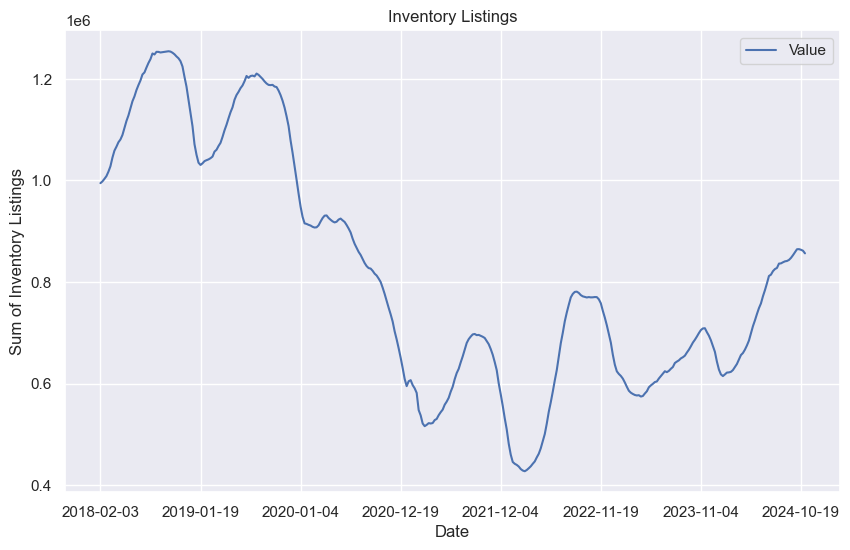

In [1788]:
inventory_trend_df = inventory_cleaned_df.groupby("Date")["Value"].sum().reset_index()
inventory_trend_df.plot(x="Date", y="Value", figsize=(10, 6), linestyle="-", title="Inventory Listings", xlabel="Date", ylabel="Sum of Inventory Listings", grid=True)


**Trend of Sale Prices over time**

<Axes: title={'center': 'Sale Prices'}, xlabel='Date', ylabel='Sum of Sale Prices'>

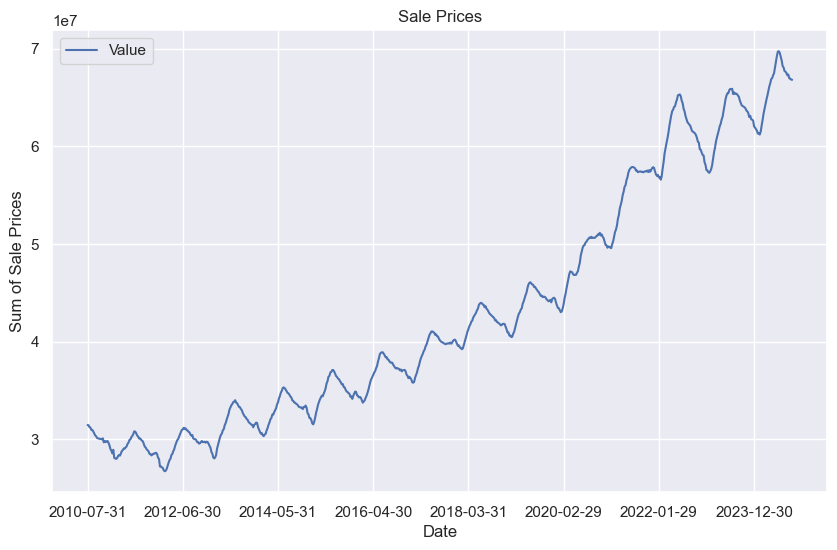

In [1789]:
sales_trend_df = sales_cleaned_df.groupby("Date")["Value"].sum().reset_index()
sales_trend_df.plot(x="Date", y="Value", figsize=(10, 6), linestyle="-", title="Sale Prices", xlabel="Date", ylabel="Sum of Sale Prices", grid=True)


**Top 10 states for inventory listings**

C:\Users\arthu\AppData\Local\Temp\ipykernel_28972\327549068.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_10_states["StateName"], rotation=45, ha="right", fontsize=10)


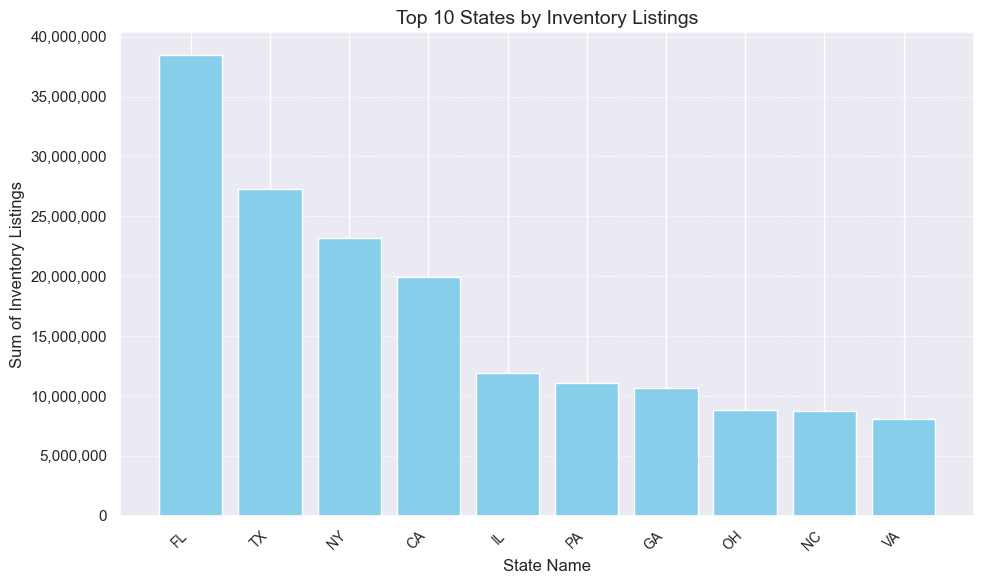

In [1790]:
# Group and calculate the total inventory value for each region
inventory_trend_df = inventory_cleaned_df.groupby("StateName")["Value"].sum().reset_index()

# Sort by "Value" in descending order and select the top 10 regions
top_10_states = inventory_trend_df.sort_values(by="Value", ascending=False).head(10)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_states["StateName"], top_10_states["Value"], color="skyblue")

# Add titles and labels
ax.set_title("Top 10 States by Inventory Listings", fontsize=14)
ax.set_xlabel("State Name", fontsize=12)
ax.set_ylabel("Sum of Inventory Listings", fontsize=12)

# Rotate x-axis labels for readability
ax.set_xticklabels(top_10_states["StateName"], rotation=45, ha="right", fontsize=10)

# Format the y-axis to show full values
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))  # Adds commas and removes scientific notation


# Add grid
ax.grid(axis="y", linestyle="--", linewidth=0.5)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


**Top 10 states for sale prices**

C:\Users\arthu\AppData\Local\Temp\ipykernel_28972\2700915036.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_10_states["StateName"], rotation=45, ha="right", fontsize=10)


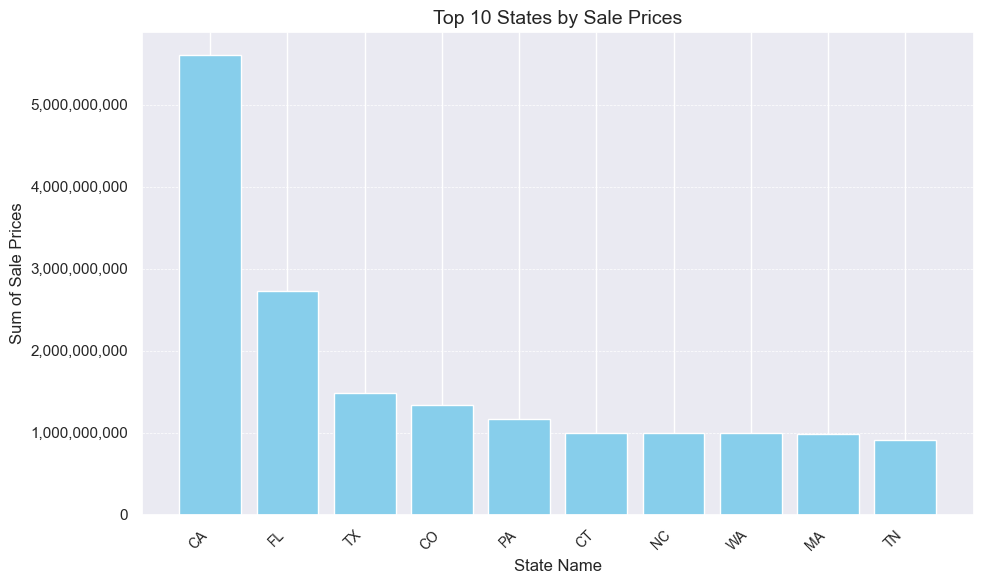

In [1791]:
# Group and calculate the total inventory value for each region
sales_trend_df = sales_cleaned_df.groupby("StateName")["Value"].sum().reset_index()

# Sort by "Value" in descending order and select the top 10 regions
top_10_states = sales_trend_df.sort_values(by="Value", ascending=False).head(10)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_states["StateName"], top_10_states["Value"], color="skyblue")

# Add titles and labels
ax.set_title("Top 10 States by Sale Prices", fontsize=14)
ax.set_xlabel("State Name", fontsize=12)
ax.set_ylabel("Sum of Sale Prices", fontsize=12)

# Rotate x-axis labels for readability
ax.set_xticklabels(top_10_states["StateName"], rotation=45, ha="right", fontsize=10)

# Format the y-axis to show full values
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))  # Adds commas and removes scientific notation


# Add grid
ax.grid(axis="y", linestyle="--", linewidth=0.5)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()
